# ECSE 415 - Assignment 5:  Segmentation
## Theo Ghanem 260972584

Note that parts of this assignment have been taken/inspired from the following sources:
- Tutorials
- PyTorch documentation
- StackOverflow
- Class lectures

## Part 1 - K-Means and Mean-Shift Clustering for Segmentation

### 1.Compute  the  features  of  the Dog.jpg  and Person.jpg images  by  convolving  the  images with the two Haar filter kernels shown below. 
The white areas of the Haar filter kernel all have a  weight  of  +1,  while  the  black  areas  have  a  weight  of -1.  For  the  purposes  of  obtaining the convolution  values  for  pixels  near  the  border  of  the  image,  assume  that  the  intensity values of pixels outside the borders of the image are 0. You could use the integral image technique to implement the Haar filtering in a more computationally efficient (i.e. faster)manner.Display the filtered feature images

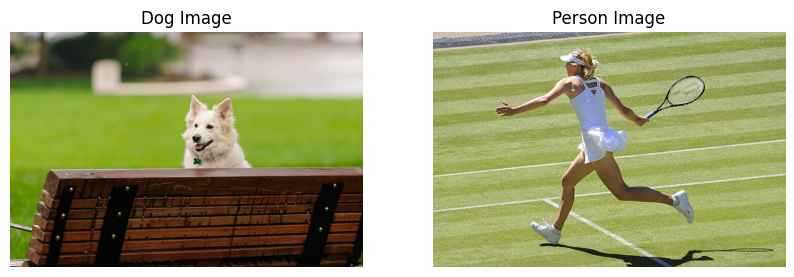

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Load image Google Drive
image_path = '/content/drive/My Drive/ECSE415_computer_vision/A5'
# image_path = "/Users/theog/Documents/CodingProjects/ECSE415_Computer_Vision/Assignments/A5"
dog_image = cv2.imread(image_path + "/Part 1/Dog.jpg")
person_image = cv2.imread(image_path + "/Part 1/Person.jpg")

# show both images next to each other:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB))
plt.title("Dog Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB))
plt.title("Person Image")
plt.axis('off')
plt.show()

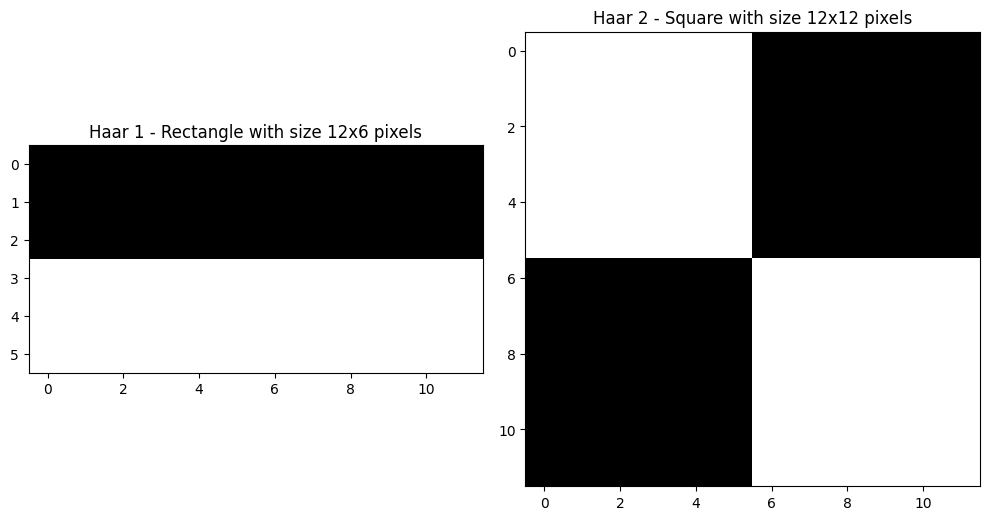

In [6]:
# Define Haar1 filter (rectangle 12x6)
haar1_top = -1 * np.ones((3, 12))  # White top rectangle
haar1_bottom = np.ones((3, 12))  # Black bottom rectangle
haar1 = np.vstack((haar1_top, haar1_bottom)) # Combined 

# Define Haar2 filter (square 12x12)
haar2_top_left = np.ones((6, 6))
haar2_top_right = -1 * np.ones((6, 6))
haar2_bottom_left = -1 * np.ones((6, 6))
haar2_bottom_right = np.ones((6, 6))

# combine the 4 quadrants
haar2_top = np.hstack((haar2_top_left, haar2_top_right))
haar2_bottom = np.hstack((haar2_bottom_left, haar2_bottom_right))
haar2 = np.vstack((haar2_top, haar2_bottom))

# Plot filters
plt.figure(figsize=(10, 5))  # Adjust figure size for two subplots

# Subplot 1: Haar1
plt.subplot(1, 2, 1)
plt.imshow(haar1, cmap='gray')
plt.title('Haar 1 - Rectangle with size 12x6 pixels')

# Subplot 2: Haar2
plt.subplot(1, 2, 2)
plt.imshow(haar2, cmap='gray')
plt.title('Haar 2 - Square with size 12x12 pixels')

plt.tight_layout()  # Adjust spacing between subplots for better visualization
plt.show()

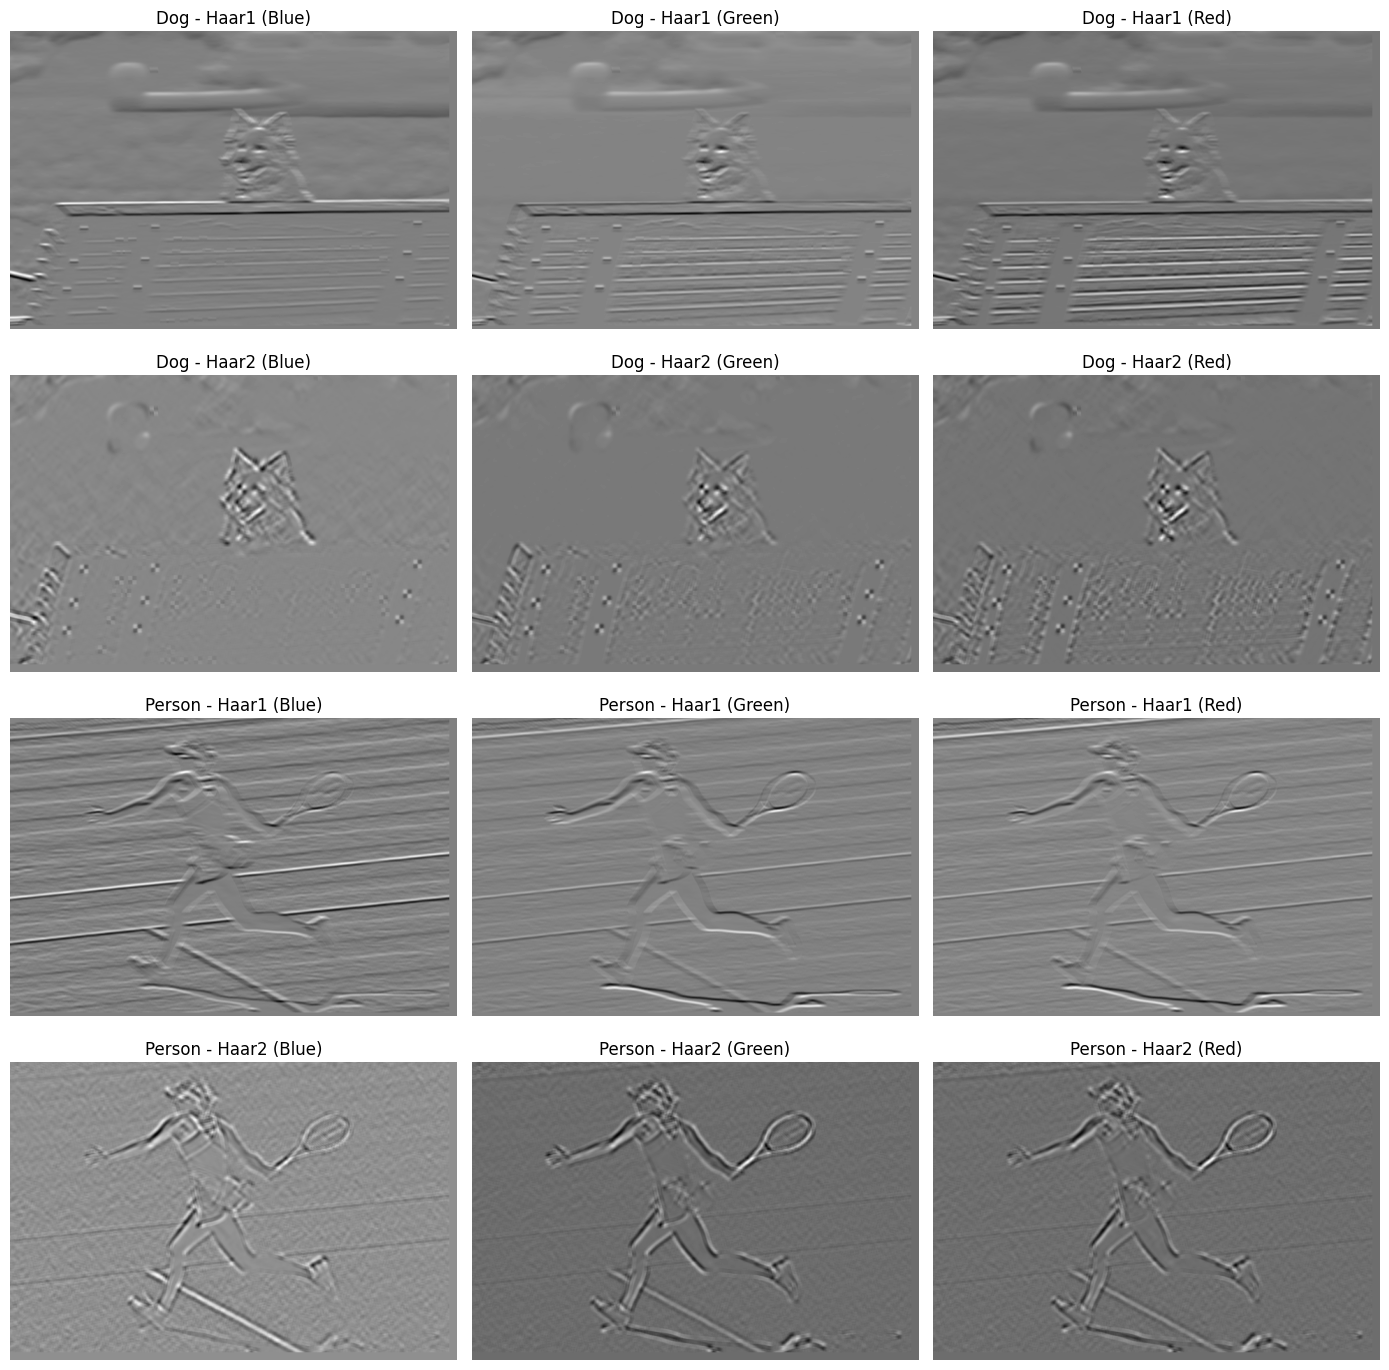

In [7]:
def convolve_haar(image, haar_filter):
    gray_image = image
    # Initialize output image
    output_image = np.zeros_like(gray_image, dtype=np.float32)
    # Get image dimensions
    image_height, image_width = gray_image.shape
    # Get filter dimensions
    filter_height, filter_width = haar_filter.shape
    # Loop through image
    for i in range(image_height - filter_height + 1):
        for j in range(image_width - filter_width + 1):
            # Get region of interest
            roi = gray_image[i:i + filter_height, j:j + filter_width]
            # Compute convolution
            output_image[i, j] = np.sum(roi * haar_filter)
    return output_image

def convolve_haar_color_channels(image, haar_filter):
    # Separate color channels
    blue, green, red = cv2.split(image)

    # Convolve each channel separately
    blue_output = convolve_haar(blue, haar_filter)
    green_output = convolve_haar(green, haar_filter)
    red_output = convolve_haar(red, haar_filter)

    return blue_output, green_output, red_output

# Convolve with Haar1 for each color channel
dog_haar1_blue, dog_haar1_green, dog_haar1_red = convolve_haar_color_channels(dog_image, haar1)
person_haar1_blue, person_haar1_green, person_haar1_red = convolve_haar_color_channels(person_image, haar1)

# Convolve with Haar2 for each color channel
dog_haar2_blue, dog_haar2_green, dog_haar2_red = convolve_haar_color_channels(dog_image, haar2)
person_haar2_blue, person_haar2_green, person_haar2_red = convolve_haar_color_channels(person_image, haar2)

# Display filtered feature images (adjusted for all color channels)
plt.figure(figsize=(14, 14))  # Larger figure for more subplots

# Subplots for Dog.jpg with Haar1 and Haar2 for each color channel
plt.subplot(4, 3, 1)
plt.imshow(dog_haar1_blue, cmap='gray')
plt.title('Dog - Haar1 (Blue)')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(dog_haar1_green, cmap='gray')
plt.title('Dog - Haar1 (Green)')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(dog_haar1_red, cmap='gray')
plt.title('Dog - Haar1 (Red)')
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(dog_haar2_blue, cmap='gray')
plt.title('Dog - Haar2 (Blue)')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(dog_haar2_green, cmap='gray')
plt.title('Dog - Haar2 (Green)')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(dog_haar2_red, cmap='gray')
plt.title('Dog - Haar2 (Red)')
plt.axis('off')

# Subplots for Person.jpg with Haar1 and Haar2 for each color channel (adjust titles accordingly)
plt.subplot(4, 3, 7)
plt.imshow(person_haar1_blue, cmap='gray')
plt.title('Person - Haar1 (Blue)')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(person_haar1_green, cmap='gray')
plt.title('Person - Haar1 (Green)')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(person_haar1_red, cmap='gray')
plt.title('Person - Haar1 (Red)')
plt.axis('off')

plt.subplot(4, 3, 10)
plt.imshow(person_haar2_blue, cmap='gray')
plt.title('Person - Haar2 (Blue)')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.imshow(person_haar2_green, cmap='gray')
plt.title('Person - Haar2 (Green)')
plt.axis('off')

plt.subplot(4, 3, 12)
plt.imshow(person_haar2_red, cmap='gray')
plt.title('Person - Haar2 (Red)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 2. Implement the K-means clustering to compute the segmentation of the Dog.jpg and the Person.jpg image with Haar features. 
Set K=3. Display the segmented images.

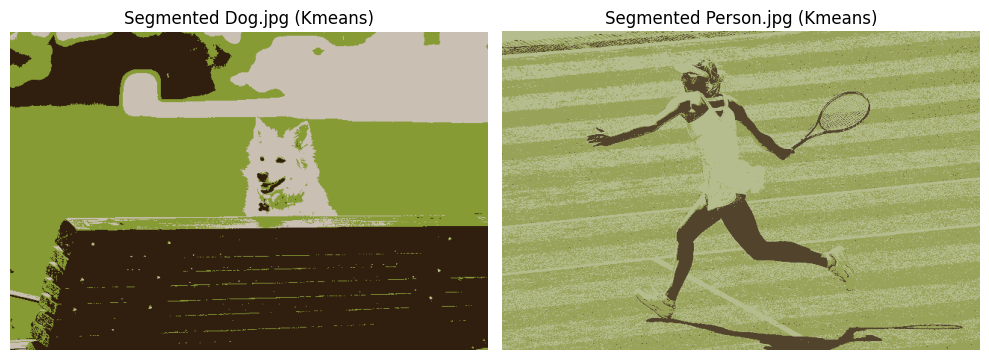

In [15]:
# Based on implementation in tutorial 9
def kmeans_segmentation(image, k):

    # Convert image to RGB and reshape
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    Z = image_rgb.reshape((-1, 3))

    # Convert to float32
    Z = np.float32(Z)

    # Define criteria and perform K-Means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert center back to uint8 and reshape
    center = np.uint8(center)
    out = center[label.flatten()]
    out = out.reshape(image.shape)

    return out

kmeans_segmented_dog = kmeans_segmentation(dog_image, 3)
kmeans_segmented_person = kmeans_segmentation(person_image, 3)

# Display segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(kmeans_segmented_dog)
plt.title('Segmented Dog.jpg (Kmeans)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_segmented_person)
plt.title('Segmented Person.jpg (Kmeans)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 3. Implement the Mean-shift clustering to compute the segmentation of the Dog.jpg and Person.jpg images. 
Display the segmented images.

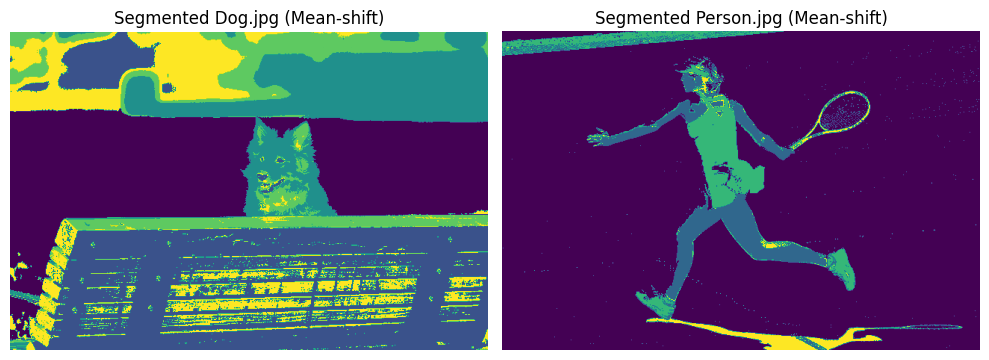

In [9]:
from sklearn.cluster import MeanShift

def mean_shift_segmentation(images):
    segmented_images = []
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

        # Reshape pixels for clustering
        pixels = image.reshape((-1, 3))

        # Perform Mean-shift clustering
        ms = MeanShift(bandwidth=25, bin_seeding=True)
        labels = ms.fit_predict(pixels)

        # Reshape labels to image dimensions
        segmented_image = labels.reshape(image.shape[:2])
        segmented_images.append(segmented_image)
    return segmented_images

images = [dog_image, person_image]
# Segment all images at once
segmented_images = mean_shift_segmentation(images)

# Display segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(segmented_images[0])
plt.title('Segmented Dog.jpg (Mean-shift)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_images[1])
plt.title('Segmented Person.jpg (Mean-shift)')
plt.axis('off')

plt.tight_layout()
plt.show()

#### 4. Discuss the benefits and limitations of these clustering methods for image segmentation.

Based on information gathered from opencv documentation and other sources.
The following are the benefits and limitations of K-means and Mean-shift clustering methods for image segmentation:

- **K-means clustering**: 
    - **Benefits:**
        - **Simplicity and Efficiency:** well-established and computationally efficient algorithm. It's relatively easy to implement and works well for large datasets.
        - **Interpretability:** the cluster centers provide a basic understanding of the color distribution in the image.
        **Scalability:** can handle large images efficiently due to its linear time complexity.
    - **Limitations:**
        - **Predefined Clusters:** requires specifying the number of clusters (K) beforehand. It's not always obvious what the right number of clusters should be.
        - **Sensitivity to Initialization:** is sensitive to the initial placement of cluster centroids. Poor initial positions can lead to poor clustering results.
        - **Shape Limitations:** assumes spherical clusters. It might struggle with images containing irregularly shaped objects or overlapping regions.
- **Mean-Shift Clustering**
    - **Benefits:**
        - **Automatic Cluster Detection:** doesn't require predefining the number of clusters. It automatically identifies areas of high density in the data, leading to a more data-driven segmentation rather than user-driven.
        - **Flexible Cluster Shapes:** can effectively handle clusters with irregular shapes, making it suitable for complex images.
        - **Robustness to Outliers:** generally less sensitive to outliers compared to K-means.
                
    - **Limitations:**
        - **Computational Cost:** can be computationally expensive for high-dimensional data and large images.
        - **Convergence Issues:** can be sensitive to the choice of the kernel function and its parameters. It might not always converge to optimal clusters.
        - **Interpretability:** the lack of pre-defined clusters can make it slightly less interpretable compared to K-means with its well-defined cluster centers.

In the context of image segmentation, choosing the right image segmentation technique depends on the image itself. K-means clustering is better when dealing with straightforward images where objects have distinct colors and there's a clear idea of how many segments you expect. It's efficient and easy to understand. However, complex images with irregular shapes or blurry areas can make it less accurate.

Whereas mean-shift clustering can automatically figure out the number of segments in an image, which is handy when you're unsure. It's also better at handling those trickier images (like those with more bumps and blends). On the downside, it can be more computationally demanding and requires some fine-tuning to get the best results.


## Part 2 - Neural Network Implementation for Image Segmentation

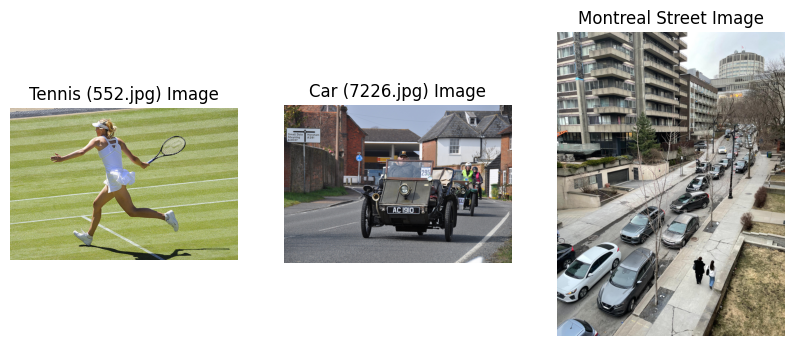

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import visualize
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from ultralytics import YOLO

%matplotlib inline

# Uncomment for colab
# from google.colab import drive
# drive.mount('/content/drive')
# image_path = '/content/drive/My Drive/ECSE415_computer_vision/A5'

# image_path = "/Users/theog/Documents/CodingProjects/ECSE415_Computer_Vision/Assignments/A5"

tennis_image = cv2.imread(image_path + "/Part 2/000000000552.jpg")
car_image = cv2.imread(image_path + "/Part 2/000000007226.jpg")
street_image = cv2.imread(image_path + "/Part 2/image_street.jpg")

images = [tennis_image, car_image, street_image]
image_names = ['Tennis', 'Car', 'Montreal street']

# show images next to each other:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(tennis_image, cv2.COLOR_BGR2RGB))
plt.title("Tennis (552.jpg) Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB))
plt.title("Car (7226.jpg) Image")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(street_image, cv2.COLOR_BGR2RGB))
plt.title("Montreal Street Image")
plt.axis('off')
plt.show()


### 1. Implement the pre-trained Mask R-CNN and YOLOv8n-seg model and run them on the 552.jpg and 7726.jpg image included in the assignment folder.

In [3]:
#================= Pre-trained Mask R-CNN =================
# Load the pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

transform = T.Compose([T.ToTensor()])

# List to store the predictions
predictions = []

# Loop over the images and make the predictions
for image in images:
  # Convert the image to a tensor
  image_tensor = transform(image)
  # Get the model's prediction
  with torch.no_grad():
    prediction = model([image_tensor.to(torch.float32)])
  # Add the prediction to the list
  predictions.append(prediction)

# COCO_INSTANCE_CATEGORY_NAMES provided on the RCNN github
COCO_INSTANCE_CATEGORY_NAMES = [
  '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
  'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
  'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
  'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
  'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
  'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
  'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
  'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
  'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
  'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
  'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

C:\Users\theog\Documents\CodingProjects\ECSE415_Computer_Vision\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\theog\Documents\CodingProjects\ECSE415_Computer_Vision\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### 2. Display the result that shows the bounding boxes, object classes, and segmentations inside each bounding box.


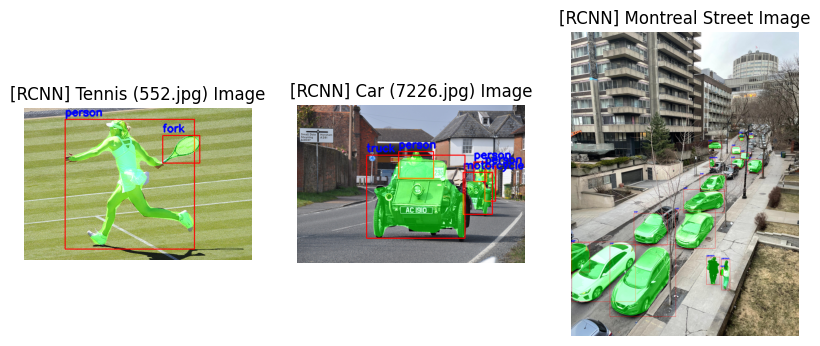

In [4]:
def create_mask(image, mask, color=(0, 255, 0)):
  mask = mask.mul(255).byte().cpu().numpy()
  color_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
  color_mask[mask > 128] = np.array(color, dtype=np.uint8)
  return cv2.addWeighted(image, 1, color_mask, 0.5, 0)

def draw_box(image, box, color=(0, 0, 255)):
  cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color, 2)
  return image

def draw_label(image, box, label, color=(255, 0, 0)):
  cv2.putText(image, label, (int(box[0]), int(box[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)
  return image

def process_image_with_predictions(image, prediction, threshold=0.75):
  for element in range(len(prediction[0]['masks'])):
    mask = prediction[0]['masks'][element, 0]
    score = prediction[0]['scores'][element].item()
  
    if score > threshold:
      image = create_mask(image, mask)
      box = prediction[0]['boxes'][element].cpu().numpy()
      image = draw_box(image, box)
  
      label = prediction[0]['labels'][element].item()
      label_name = COCO_INSTANCE_CATEGORY_NAMES[label]
      image = draw_label(image, box, label_name)
  
  return image

labelled_tennis_image = process_image_with_predictions(tennis_image, predictions[0])
labelled_car_image = process_image_with_predictions(car_image, predictions[1])
labelled_street_image = process_image_with_predictions(street_image, predictions[2])


# show images next to each other:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(labelled_tennis_image, cv2.COLOR_BGR2RGB))
plt.title("[RCNN] Tennis (552.jpg) Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(labelled_car_image, cv2.COLOR_BGR2RGB))
plt.title("[RCNN] Car (7226.jpg) Image")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(labelled_street_image, cv2.COLOR_BGR2RGB))
plt.title("[RCNN] Montreal Street Image")
plt.axis('off')
plt.show()

In [5]:
#================= Pre-trained YOLOv8 =================
!pip install ultralytics
!pip install onnxruntime-gpu  # For GPU support
!pip install numpy
!pip install opencv-python

!yolo export model=yolov8s-seg.pt imgsz=640 format=onnx opset=12 simplify

DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Invalid requirement: '#'


DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


Ultralytics YOLOv8.1.27 ðŸš€ Python-3.10.11 torch-2.2.1+cu121 CPU (11th Gen Intel Core(TM) i9-11900H 2.50GHz)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

PyTorch: starting from 'yolov8s-seg.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 116, 8400), (1, 32, 160, 160)) (22.8 MB)

ONNX: starting export with onnx 1.16.0 opset 12...
ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success âœ… 2.7s, saved as 'yolov8s-seg.onnx' (45.2 MB)

Export complete (5.3s)
Results saved to C:\Users\theog\Documents\CodingProjects\ECSE415_Computer_Vision\Assignments\A5
Predict:         yolo predict task=segment model=yolov8s-seg.onnx imgsz=640  
Validate:        yolo val task=segment model=yolov8s-seg.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/export


In [6]:
# Load a pretrained YOLO model
model = YOLO('yolov8s-seg.pt')
detected_images=[]
for image in images:
  results = model.predict(image)
  result=results[0]
  detected_images.append(result.plot())

# Extract segemented images
detected_image_street = detected_images[2]
detected_image_car = detected_images[1]
detected_image_tennis = detected_images[0]

# show images next to each other:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(detected_image_tennis, cv2.COLOR_BGR2RGB))
plt.title("[YOLOv8] Tennis (552.jpg) Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(detected_image_car, cv2.COLOR_BGR2RGB))
plt.title("[YOLOv8] Car (7226.jpg) Image")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(detected_image_street, cv2.COLOR_BGR2RGB))
plt.title("[YOLOv8] Montreal Street Image")
plt.axis('off')
plt.show()

NotImplementedError: Could not run 'torchvision::nms' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'torchvision::nms' is only available for these backends: [CPU, Meta, QuantizedCPU, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradMPS, AutogradXPU, AutogradHPU, AutogradLazy, AutogradMeta, Tracer, AutocastCPU, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\cpu\nms_kernel.cpp:112 [kernel]
Meta: registered at /dev/null:440 [kernel]
QuantizedCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\quantized\cpu\qnms_kernel.cpp:124 [kernel]
BackendSelect: fallthrough registered at ..\aten\src\ATen\core\BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at ..\aten\src\ATen\core\PythonFallbackKernel.cpp:154 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at ..\aten\src\ATen\functorch\DynamicLayer.cpp:498 [backend fallback]
Functionalize: registered at ..\aten\src\ATen\FunctionalizeFallbackKernel.cpp:324 [backend fallback]
Named: registered at ..\aten\src\ATen\core\NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at ..\aten\src\ATen\ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at ..\aten\src\ATen\native\NegateFallback.cpp:19 [backend fallback]
ZeroTensor: registered at ..\aten\src\ATen\ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:86 [backend fallback]
AutogradOther: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:53 [backend fallback]
AutogradCPU: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:57 [backend fallback]
AutogradCUDA: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:65 [backend fallback]
AutogradXLA: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:69 [backend fallback]
AutogradMPS: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:77 [backend fallback]
AutogradXPU: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:61 [backend fallback]
AutogradHPU: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:90 [backend fallback]
AutogradLazy: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:73 [backend fallback]
AutogradMeta: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:81 [backend fallback]
Tracer: registered at ..\torch\csrc\autograd\TraceTypeManual.cpp:297 [backend fallback]
AutocastCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:34 [kernel]
AutocastCUDA: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:27 [kernel]
FuncTorchBatched: registered at ..\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:720 [backend fallback]
BatchedNestedTensor: registered at ..\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:746 [backend fallback]
FuncTorchVmapMode: fallthrough registered at ..\aten\src\ATen\functorch\VmapModeRegistrations.cpp:28 [backend fallback]
Batched: registered at ..\aten\src\ATen\LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at ..\aten\src\ATen\VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at ..\aten\src\ATen\functorch\TensorWrapper.cpp:203 [backend fallback]
PythonTLSSnapshot: registered at ..\aten\src\ATen\core\PythonFallbackKernel.cpp:162 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at ..\aten\src\ATen\functorch\DynamicLayer.cpp:494 [backend fallback]
PreDispatch: registered at ..\aten\src\ATen\core\PythonFallbackKernel.cpp:166 [backend fallback]
PythonDispatcher: registered at ..\aten\src\ATen\core\PythonFallbackKernel.cpp:158 [backend fallback]


### 4. Compare the performance of these two models and explain the steps that Mask R-CNN took to achieve the final result.


We can determine the following from the pictures and the results:
- **Tennis image:**
  - *Mask R-CNN:* The model was able to detect the tennis racket and the person holding it. However, it mislabelled the tennis racket for a "Fork"
  - *YOLOv8:* The model was able to detect the tennis racket and the person holding it. And it labelled everything correctly
- **Car image:**
  - *Mask R-CNN:* The model was able to detect the cars and the people. However, it mislabelled the first car as a Truck
  - *YOLOv8:* The model was able to detect the cars and the people. However, it mislabelled the first car as a Motorcycle and it detected two people instead of one (the one in the front)
- **Montreal Street image:**
  - *Mask R-CNN:* The model was able to detect most cars and the people. Although it labelled everything correctly, it did not detect as many cars as YOLOv8
  - *YOLOv8:* The model was able to detect all the cars and the people. And it labelled everything correctly



Based on these two papers, we can determine that Mask R-CNN takes the following steps to achieve the final result:
https://arxiv.org/abs/1703.06870
https://paperswithcode.com/paper/mask-r-cnn

1. **Region Proposal Network (RPN):** The image is passed through the RPN, which generates bounding boxes for potential objects.
2. **Feature Extraction:** The entire image and the proposed bounding boxes are fed into a convolutional neural network (CNN) to extract features.
3. **Classification and Bounding Box Regression:** The extracted features are used to classify each proposal into a specific object class (e.g., car, person, fork) and refine the bounding boxes for better accuracy.
4. **Mask Branch:** A separate branch predicts a binary mask for each proposal. This mask has the same size as the bounding box and indicates the probability of each pixel belonging to the object.
5. **Non-Maximum Suppression (NMS):** The final step is to apply NMS to remove duplicate detections and keep only the most confident ones.

The final output of Mask R-CNN is a combination of bounding boxes, class labels, and segmentation masks for each detected object.

